# Battle of Neighbourhoods

## Table of Contents

1. [Introduction](#1--Introduction)
1. [Discussion and Background of the Business Problem](#2--Discussion-and-Background-of-the-Business-Problem)
1. [Data Preparation](#3--Data-Preparation)
1. [Methodology](#4--Methodology)
1. [Results](#5--Results)
1. [Discussion](#6--Discussion)
1. [Conclusion](#7--Conclusion)
1. [References](#8--References)

## 1- Introduction

This notebook is prepared for the final part of the capstone project of IBM data science course. In this notebook, we will try to define a business problem, look for usable data to use Foursquare location data to compare different districts of Antalya (a city in Turkey), and figure out possible solutions to our business problem.

## 2- Discussion and Background of the Business Problem

Antalya is a touristic city located on the southwest cost of Turkey. Surrounded by Taurus Mountains on the north and Mediterranean Sea on the south, it is the fifth most populous city of Turkey with an over one million people. 
<img src="https://www.researchgate.net/publication/326379220/figure/fig1/AS:647977995624449@1531501401296/Location-of-Antalya-province-in-Turkey-red-colored-area-Map-shown-in-this-article-was.png" alt="Antalya" title="Antalya" />

Thanks to its beautiful landscape, wonderful beaches and historical background, Antalya attracts over 10 million tourist each year from all over the World. According to Turkish state statistics office, a record 12.5 million tourists passed through the city in 2014.

During touristic season, especially summer times, visitors all over the world provides a huge opportunity for souvenir shops.  Many people like to take a little something home with them as a reminder of their travels, something to show for where they have been, something they can use to look back and reminisce about the fantastic experience they had during their holiday or something that will make their loved ones happy when they return. Therefore, in this project we will try to provide best location to open a souvenir shop among Antalya’s 19 districts. We will especially concentrate on the central five districts that are closer to main province.

We will go through each step of this project and address them separately. I first outline the initial data preparation and describe future steps to start the battle of neighborhoods in Antalya.

**This analysis mainly targets the stakeholders or business owners that are planning to open a souvenir shop or start business in souvenir shop in Antalya province of Turkey.**

## 3- Data Preparation

For this project, we will get the post codes for each district in Antalya province and use Foursquare app to get nearby venues that attract more tourists. Also, we will examine nearby hotels and sight seeing places and based on this analysis we will try to make recommandations for the most suitable location for our souvenir business. Let's start by getting the location data for our target city.

### Getting District Data for Antalya

Fist of all we will try to optain district data for the Antalya Province. Lucily we have the data available on the state postal office website as a zip file on this link http://postakodu.ptt.gov.tr/. I have downloaded and arranged the data as csv format and uploaded the IBM cloud. Here, we will read this data into a pandas dataframe.

In [1]:
# The code was removed by Watson Studio for sharing.

,Province,City,District,Postcode
0,ANTALYA,AKSEKİ,AKSEKİ,7630
1,ANTALYA,AKSEKİ,AKSEKİ,7630
2,ANTALYA,AKSEKİ,AKSEKİ,7630
3,ANTALYA,AKSEKİ,AKSEKİ,7630
4,ANTALYA,AKSEKİ,AKSEKİ,7630


we need to modify Postcode column to start with 0 and convert it to type string. and also we need to remove dublicate values of Postcode since we only need the center of each district.

In [2]:
df_antalya['Postcode'] = pd.DataFrame('0'+df_antalya['Postcode'].astype(str))
df_antalya_new = df_antalya.groupby('Postcode').agg(lambda x: ','.join(set(x))).reset_index()
df_antalya_new.head()

,Postcode,Province,City,District
0,07010,ANTALYA,MURATPAŞA,ESKİSANAYİ
1,07020,ANTALYA,KEPEZ,VARSAK
2,07025,ANTALYA,KEPEZ,DOKUMA
3,07030,ANTALYA,MURATPAŞA,MELTEM
4,07040,ANTALYA,MURATPAŞA,ÇARŞI


### Get the Location Coordinates for each District
Now our Postcodes are ready. We can start getting geolocation for each district. In order to do that, we will import and install neccessary librareis first.

In [3]:
#for geolocation search
!pip install geopandas 
!pip install geopy 
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

     |████████████████████████████████| 931kB 7.7MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 34.7MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 37.6MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 21.4MB/s eta 0:00:01


Now we can create a new dataframe with district coordinates

In [4]:
#get the location for antalya
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Antalya, TR")

df_address = pd.DataFrame(df_antalya_new['Postcode'].astype(str) + ', Antalya, TR')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.1)
# 2- - create location column
df_antalya_new['location'] = df_address['Postcode'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_antalya_new['point'] = df_antalya_new['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_antalya_new[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_antalya_new['point'].tolist(), index=df_antalya_new.index)

df_antalya_new


,Postcode,Province,City,District,location,point,latitude,longitude,altitude
0,07010,ANTALYA,MURATPAŞA,ESKİSANAYİ,"(Cumhuriyet Mahallesi, Muratpaşa, Antalya, Akd...","(36.9041492, 30.700651575000002, 0.0)",36.904149,30.700652,0.0
1,07020,ANTALYA,KEPEZ,VARSAK,"(Antalya, Muratpaşa, Antalya, Akdeniz Bölgesi,...","(36.9009641, 30.6954846, 0.0)",36.900964,30.695485,0.0
2,07025,ANTALYA,KEPEZ,DOKUMA,"(Özgürlük Mahallesi, Kepez, Antalya, Akdeniz B...","(36.91393495, 30.67963175, 0.0)",36.913935,30.679632,0.0
3,07030,ANTALYA,MURATPAŞA,MELTEM,"(Muratpaşa, Antalya, Akdeniz Bölgesi, 07030, T...","(36.8804352369126, 30.784500713480504, 0.0)",36.880435,30.784501,0.0
4,07040,ANTALYA,MURATPAŞA,ÇARŞI,"(Antalya, Muratpaşa, Antalya, Akdeniz Bölgesi,...","(36.8934522, 30.7015535, 0.0)",36.893452,30.701553,0.0
5,07050,ANTALYA,MURATPAŞA,BAHÇELİEVLER,"(Aqua, Adnan Menderes Bulvarı, Sorgun, Manavga...","(36.758141, 31.4275232, 0.0)",36.758141,31.427523,0.0
6,07060,ANTALYA,KEPEZ,YENİEMEK,"(Etiler Mahallesi, Muratpaşa, Antalya, Akdeniz...","(36.89754660654988, 30.709009476813485, 0.0)",36.897547,30.709009,0.0
7,07070,ANTALYA,KONYAALTI,ARAPSUYU,"(Konyaaltı, Antalya, Akdeniz Bölgesi, 07070, T...","(36.86811418704364, 30.619186886081952, 0.0)",36.868114,30.619187,0.0
8,07080,ANTALYA,KEPEZ,ERENKÖY,"(Kanal Mahallesi, Kepez, Antalya, Akdeniz Bölg...","(36.91818335442572, 30.67536680301581, 0.0)",36.918183,30.675367,0.0
9,07090,ANTALYA,KEPEZ,AHATLI,"(Kültür Mahallesi, Kepez, Antalya, Akdeniz Böl...","(36.9070753, 30.6622891, 0.0)",36.907075,30.662289,0.0


### Show each District on the MAP

We can pinpoint each district on the map. Let's first import the libraries.

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

Draw Districts of Antalya on the map

In [31]:
antalya_districts = folium.Map(
    location=[location.latitude,location.longitude],
    tiles='OpenStreetMap',
    zoom_start=9,
)

df_antalya_new.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(antalya_districts), axis=1)

antalya_districts

## 4- Methodology

We will use Foursquare to get venue data for our project. First we will enter our credentials.

In [32]:
CLIENT_ID = 'SM2L4AIYSSXMDKJ3YDQV0A0YKD2UGPA1I2PVG13ZQTD0PYJ2' # your Foursquare ID
CLIENT_SECRET = 'SN0TNC1MJ00LNJBIHQMLYSNOZ1ZZ1ZR1EWYWVGDMPLHTLBMI' # your Foursquare Secret
VERSION = '20200310' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SM2L4AIYSSXMDKJ3YDQV0A0YKD2UGPA1I2PVG13ZQTD0PYJ2
CLIENT_SECRET:SN0TNC1MJ00LNJBIHQMLYSNOZ1ZZ1ZR1EWYWVGDMPLHTLBMI


Define a function to get hotels in 1 kilometer radius

In [63]:
import requests

def getVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    
    categoryId = '4bf58dd8d48988d1fa931735'
    LIMIT = 1000
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

get all the hotels within 1km radius

In [65]:
antalya_hotels = getVenues(names=df_antalya_new['District'],
                                   latitudes=df_antalya_new['latitude'],
                                   longitudes=df_antalya_new['longitude']
                                   )

In [66]:
antalya_hotels.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ESKİSANAYİ,36.904149,30.700652,Denizhan Otel,36.899248,30.702850,Hotel
1,ESKİSANAYİ,36.904149,30.700652,Hotel Grand Kayalar,36.898951,30.699908,Hotel
2,ESKİSANAYİ,36.904149,30.700652,Hotel Star Palace,36.896029,30.699938,Hotel
3,ESKİSANAYİ,36.904149,30.700652,ELİTE OTEL,36.900154,30.702313,Hotel
4,ESKİSANAYİ,36.904149,30.700652,Elips Royal Otel,36.899703,30.706909,Hotel


We can get a bar graph of the number of hotels in each district of Antalya.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

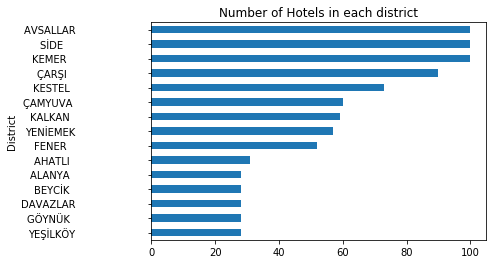

In [100]:
x = antalya_hotels.groupby('District')['Venue'].count().sort_values().tail(15)
x.plot(kind='barh', title="Number of Hotels in each district")

Similarly, we can get the number of souvenir shops in each district

In [80]:

def getVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    
    categoryId = '52f2ab2ebcbc57f1066b8b1b'
    LIMIT = 1000
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [82]:
antalya_souvenir = getVenues(names=df_antalya_new['District'],
                                   latitudes=df_antalya_new['latitude'],
                                   longitudes=df_antalya_new['longitude']
                                   )
antalya_souvenir.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ESKİSANAYİ,36.904149,30.700652,ASK Çelik Teflon Ticaret Ltd.,36.896582,30.699328,Souvenir Shop
1,ESKİSANAYİ,36.904149,30.700652,ipekyolu hediyelik,36.896599,30.704788,Souvenir Shop
2,ESKİSANAYİ,36.904149,30.700652,Falez Hediyelik,36.897017,30.706312,Souvenir Shop
3,ESKİSANAYİ,36.904149,30.700652,Mercan Oyuncak,36.895532,30.700520,Souvenir Shop
4,VARSAK,36.900964,30.695485,ASK Çelik Teflon Ticaret Ltd.,36.896582,30.699328,Souvenir Shop


Let's make a bar graph for the number of souvenir shops in each district

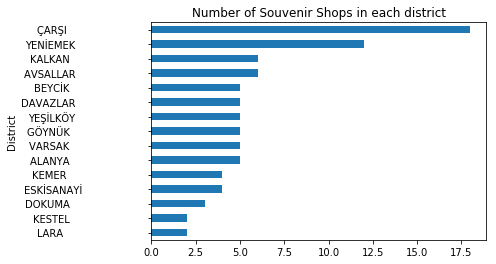

In [85]:
y = antalya_souvenir.groupby('District')['Venue'].count().sort_values().tail(15)
y.plot(kind='barh', title="Number of Souvenir Shops in each district")

## 5- Results

Finally, we can merge each data frame and find the best district which has the least number of souvenir shops (less competitors) and the most number of hotels (more costumers). 

In [101]:
#Get the dataframe for hotel counts
antalya_hotel_counts = pd.DataFrame(antalya_hotels.District.value_counts().reset_index().values, columns=["District", "HotelCount"])

#Get the dataframe for souvenir counts
antalya_souvenir_counts = pd.DataFrame(antalya_souvenir.District.value_counts().reset_index().values, columns=["District", "SouvenirCount"])

#merge two dataframes into one dataframe
antalya_merged = pd.merge(antalya_hotel_counts, antalya_souvenir_counts, how='left', left_on = 'District', right_on = 'District')

#fill null values with zero
antalya_merged["SouvenirCount"].fillna(int("0"), inplace = True)

#sort and show the dataframe
district_sorted  =antalya_merged.sort_values(["HotelCount", "SouvenirCount"], ascending = (False, True)).reset_index(drop=True)

district_sorted 

,District,HotelCount,SouvenirCount
0,SİDE,100,0
1,KEMER,100,4
2,AVSALLAR,100,6
3,ÇARŞI,90,18
4,KESTEL,73,2
5,ÇAMYUVA,60,0
6,KALKAN,59,6
7,YENİEMEK,57,12
8,FENER,52,2
9,AHATLI,31,0


Here is a bar graph representation of our final result. We can clearly see that SIDE district is the most suitable location for our souvenir shop. It has the least number of souvenir shops and the most number of hotels.

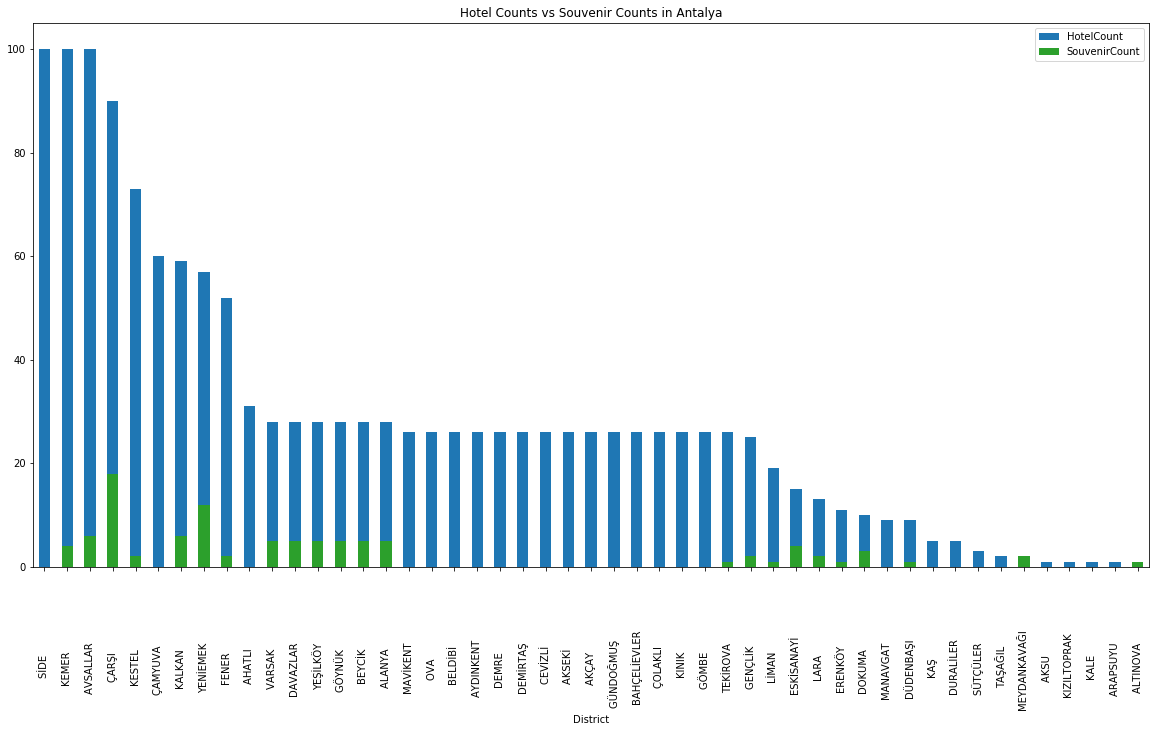

In [106]:
ax = district_sorted.plot(x="District", y="HotelCount", kind="bar", figsize=(20,10), title='Hotel Counts vs Souvenir Counts in Antalya')
district_sorted.plot(x="District", y="SouvenirCount", kind="bar", ax=ax, color="C2")
plt.show()

## 6- Discussion

As I mentioned before, Antalya is Turkey's fifth largest city with millions of visitors each year. 

In this analysis, I tried to solve location data of many districts of Antalya and acquire as many insights as I can. One approach I used was to get the district name which has the greatest number of hotels (that means more visitors and more customers) and the least number of souvenir shops (a smaller number of competitors). 

I used foursquare app data to get nearby hotels and souvenir shops in each district center and used this data to make my final conclusion. 

Finally, I used different kinds of piloting techniques to present final results visually.


## 7- Conclusion

As a result, for people who are looking for perfect spot in their souvenir businesses,  we can make recommendations according to our results.

We can apply same method for many other businesses and make suggestions to improve their profits


## 8- References

1. http://postakodu.ptt.gov.tr/
1. Foursquare app
1. Turkish State Statistics Office